## Problem Solving Homework 5
This homework is intended for you to develop your skills in both Pandas and linear modeling. You'll also use Seaborn to visualize the results. Again, you have to do some independent thinking to integrate various concepts you've learned in the class.

As usual, you must describe all code to get credit.

You'll be using the same NHANES data as in HW4. This data contains the result of interviews and other data collection on thousands of US adults in the 70s and 80s.



### 1. Cleaning
Read in the NHANES NHEFS data into a data frame and clean it to make it more useful for analysis with the following steps. Make a cleaned version of the data frame, codeing each column into either a binary or a number value.  For columns coded into a binary value, you must code them so that 
More extreme values get put together. Like if possible values are "Love ice cream" "Like ice cream", "Don't care about ice cream", "Dislike ice cream", "Hate ice cream" then the more positive feelings about ice cream must be put together into the same category. As well, no category should have fewer than 250 people in it. (You can reuse your HW4 code if you did HW4, but make sure you follow the requirements)

In [2]:
# Load packages and data
import pandas as pd
import numpy as np
nhefs = pd.read_csv('../data/nhefs.csv')

# For columns with categories, pull the category
cats = nhefs.loc[:,['alcoholfreq', 'exercise', 'quit']]
cats = cats.applymap(lambda x: int(x[0]))
# Replace the categorical columns in the main df with our encoded columns
nhefs = nhefs.drop(['alcoholfreq', 'exercise', 'quit'], axis=1)
nhefs = pd.concat([cats, nhefs], axis=1)

# nerve_med
nhefs['nerve_med'] = nhefs['nerve_med'] == 'Yes'

# sex
nhefs['sex'] = nhefs['sex'] == 'man'

# marital
nhefs['marital'] = nhefs['marital'] == 'married'

# race
nhefs['race'] = nhefs['race'] == 'White'

nhefs

,alcoholfreq,exercise,quit,income,price71,price82,smokeintensity,smokeyrs,tax71_82,wt71,wt82,wt82_71,school,nerve_med,sex,marital,race
0,1,2,0,19.0,2.183594,1.739990,30,29,0.640381,79.04,68.946040,-10.093960,7,False,True,True,False
1,0,0,0,18.0,2.346680,1.797363,20,24,0.792969,58.63,61.234970,2.604970,9,False,True,True,True
2,3,2,0,15.0,1.569580,1.513428,20,26,0.320251,56.81,66.224486,9.414486,11,True,False,False,False
3,2,2,0,15.0,1.506592,1.451904,3,53,0.304993,59.42,64.410117,4.990117,5,False,True,False,False
4,2,1,0,18.0,2.346680,1.797363,20,19,0.792969,87.09,92.079251,4.989251,11,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,3,0,0,18.0,2.167969,1.940186,20,31,0.500000,57.72,61.234970,3.514970,8,False,False,True,True
1742,4,0,0,15.0,1.800781,1.647705,40,30,0.272949,62.71,NaN,NaN,12,False,False,True,True
1743,2,1,0,13.0,2.167969,1.940186,15,46,0.500000,52.39,57.152639,4.762639,6,False,True,True,True
1744,2,0,0,15.0,2.167969,1.940186,20,9,0.500000,86.75,87.543327,0.793327,11,False,True,True,True


### 2. Single predictor
Get the single predictor of weight gain (wt82_71) that best explains the weight gain.  Your answer should print the best model summary as well as what quantification you used to decide this was the best one.

Note: you may need to remove rows with missing values to get this to work.


In [3]:
import statsmodels.api as sm
# Drop NaNs
nhefs = nhefs.dropna()

# Treat columns that are bools as ints
for col in nhefs:
    nhefs[col] = nhefs[col].astype(int)

# Get the correlations between each variable for wt82_71
corr_matrix = nhefs.corr()['wt82_71']

# Remove the 1.0s of columns matching with themselves
corr_matrix = corr_matrix[corr_matrix < 1]

# The single best predictor will be either the minimum correlation or the maximum correlation, depending on which has the higher absolute value
if abs(corr_matrix.max()) > abs(corr_matrix.min()):
    # Create an X (predictors) df with the best predictor
    X = nhefs.loc[:, corr_matrix.idxmax()] # We can use idxmax/idxmin to get the index, rather than the value
else:
    X = nhefs.loc[:, corr_matrix.idxmin()]

# Add a constant
X = sm.add_constant(X)
# Make weight gain the y-value
y = nhefs['wt82_71']
# Fit a model of weight gain vs. these predictors
model = sm.OLS(y, X).fit()
model.summary()

<ipython-input-3-f3a26e96dd21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhefs[col] = nhefs[col].astype(int)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wt82_71   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           5.55e-41
Time:                        13:10:35   Log-Likelihood:                -5152.0
No. Observations:                1527   AIC:                         1.031e+04
Df Residuals:                    1525   BIC:                         1.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7393      0.841    -10.391      0.000     -10.389      -7.090
wt82           0.1550      0.011     13.814      0.000       0.133       0.177
==============================================================================
Omnibus:                      158.210   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.337
Skew:                          -0.224   Prob(JB):                    1.01e-222
Kurtosis:                       6.983   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Pair of predictors
Get the best pair of two predictors of weight gain.  Your answer should print the best model summary as well as show how you decided this was the best pair. (We will discuss more than one predictor Nov 15 or 16)

In [9]:
# Use the log-likelihood to figure out which model is the *most* likely
import statsmodels.api as sm
# Drop the weight gain var so that we only look at predictors
wt82_71pred = nhefs.drop(['wt82_71'],axis=1)
# Set the current maximum at negative infinite likelihood (so that actual models will be higher)
current_max = -np.inf
# For each pair of predictors in the dataset
for col in wt82_71pred.columns:
    for other_col in wt82_71pred.drop([col],axis=1):
        # Create an X (predictors) df with pred1 and pred2
        X = nhefs.loc[:, [col, other_col]]
        # Add a constant
        X = sm.add_constant(X)
        # Make weight gain the y-value
        y = nhefs['wt82_71']
        # Fit a model of weight gain vs. these predictors
        model = sm.OLS(y, X).fit()
        # If the likelihood is closer to 0
        if model.llf > current_max:
            # Make it the current min
            current_max = model.llf
            # Make these the best preds
            best_preds = [col, other_col]

 # Create an X (predictors) df with the best predictors
X = nhefs.loc[:, best_preds]
# Add a constant
X = sm.add_constant(X)
# Make weight gain the y-value
y = nhefs['wt82_71']
two_model = sm.OLS(y, X).fit()
two_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wt82_71   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.277e+05
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:15:25   Log-Likelihood:                -1327.1
No. Observations:                1527   AIC:                             2660.
Df Residuals:                    1524   BIC:                             2676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1390      0.071     -1.956      0.051      -0.278       0.000
wt71          -0.9583      0.002   -476.314      0.000      -0.962      -0.954
wt82           0.9597      0.002    499.280      0.000       0.956       0.963
==============================================================================
Omnibus:                      174.688   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.230
Skew:                           0.026   Prob(JB):                     3.36e-11
Kurtosis:                       2.131   Cond. No.                         499.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Predict
### 5A: Make predictions
Predict weight gain using the best models you created in 2 and 3. Do not use the "predict" function of the model.  Your answer should create a Series for each of the two models. Print out the head of the Series and the describe of the series, for each series, with the models clearly labeled.

In [10]:
# Model of single best predictor
print('Single best predictor')
# Use model parameters
wg = model.params[0] * nhefs['wt82_71'] + model.params[1]
display(wg.head())
print(wg.describe())

# Model of two best predictors
print('Two best predictors')
# Use model parameters
wg_2_preds = two_model.params[0] * nhefs['wt82_71'] + two_model.params[1]
display(wg_2_preds.head())
print(wg_2_preds.describe())

Single best predictor


0   -24.366656
1     5.172071
2    22.402996
3    10.095193
4    10.095193
Name: wt82_71, dtype: float64

count    1527.000000
mean        6.664806
std        18.450405
min      -100.675035
25%        -2.212610
50%         5.172071
75%        15.018314
max       118.403860
Name: wt82_71, dtype: float64
Two best predictors


0    0.431406
1   -1.236258
2   -2.209061
3   -1.514202
4   -1.514202
Name: wt82_71, dtype: float64

count    1527.000000
mean       -1.320533
std         1.041652
min        -7.628968
25%        -1.792145
50%        -1.236258
75%        -0.819342
max         4.739536
Name: wt82_71, dtype: float64


### 5B: Visualize predictions
Using seaborn, make a plot that has one predictor on the x-axis, and the wt82_71 on the y-axis, and the predicted values of wt82_71 also on the y-axis, in another color clearly indicated.  

#### 5B-1: Visualize model from Q2

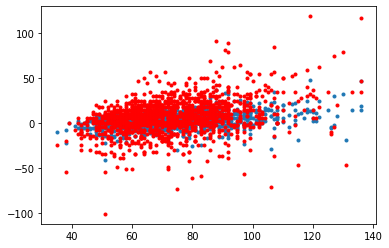

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
ax.plot(nhefs['wt82'], nhefs['wt82_71'], '.')
ax.plot(nhefs['wt82'], wg, '.', color='red')

#### 5B-2: Visualize model from Q3
Make 2 plots, one for each predictor. 

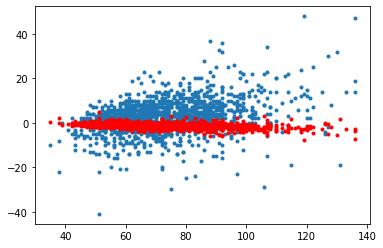

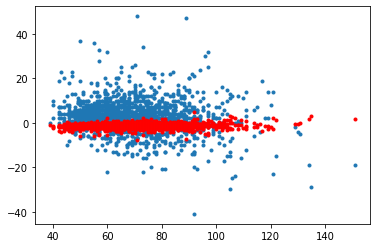

In [12]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
ax.plot(nhefs['wt82'], nhefs['wt82_71'], '.')
ax.plot(nhefs['wt82'], wg_2_preds, '.', color='red')

f, ax2 = plt.subplots(1)
ax2.plot(nhefs['wt71'], nhefs['wt82_71'], '.')
ax2.plot(nhefs['wt71'], wg_2_preds, '.', color='red')
plt.show()